In [1]:
#Call dependencies
from bs4 import BeautifulSoup
import requests
import pandas as pd
from splinter import Browser
from sqlalchemy import create_engine

# (E)xtract

In [2]:
#Activate driver
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

/usr/local/bin/chromedriver


In [3]:
#Start automated test software in Chrome
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [4]:
job_title = []
job_desc = []
job_salary = []
job_company = []
job_link = []
job_type = []

def scrap_pagination():
    browser.visit(source)
    html_source = browser.html
    source_soup = BeautifulSoup(html_source, 'html.parser')
    job_result_pag = source_soup.find('div', class_='searchCount-a11y-contrast-color').text
    job_result_pag = [int(s) for s in job_result_pag.split() if s.isdigit()]
    job_pag_total = int((int(job_result_pag[1]) / 10) + 1)
    if job_pag_total > 10:
        job_pag_total = 110
    else:
        job_pag_total = int(job_pag_total + 10)
    
    return job_pag_total

def scrap_page():
    keywords = ['python', 'sql', 'mongodb', 'sqlalchemy', 'javascript']
    #URL to be scraped
    for key in keywords:
        for i in range(0,110, 10):
            #Set URL
            source = "https://www.indeed.com.mx/trabajo?q="+ key +"&l=CDMX&start=" + str(i)
            #Load source
            browser.visit(source)
            #Extract HTML
            html_source = browser.html
            #Make the soup!
            source_soup = BeautifulSoup(html_source, 'html.parser')
            #Get job card
            job_card = source_soup.find_all('div', class_='jobsearch-SerpJobCard')
            #Loop into pagination
            if i > 9 and i < 91:
                for jb in job_card:
                    try:
                        html_jobTitle = jb.find('a', class_='jobtitle').text.strip().replace('\n', '')
                        html_jobDesc = jb.find('div', class_='summary').text.strip().replace('\n', '')
                        html_salary = jb.find('span', class_='salary').text.strip().replace('\n', '')
                        html_company_name = jb.find('span', class_='company').text.strip().replace('\n', '')
                        html_link = jb.a['href']
                        if (html_jobTitle and html_jobDesc and html_salary and html_company_name and html_link):
                            job_title.append(html_jobTitle)
                            job_desc.append(html_jobDesc)
                            html_salary = html_salary.replace('$', '').replace(',', '').replace('al mes','').replace('al año','').replace('100 al día', '')
                            job_salary.append(html_salary)
                            job_company.append(html_company_name)
                            job_link.append(html_link)
                            job_type.append(key)

                    except AttributeError as e:
                        pass
    return len(job_title)

scrap_page()

342

In [63]:
job_list = list(zip(job_title,job_desc,job_salary,job_company,job_link,job_type))

# (T)ransform

In [64]:
jobs_df = pd.DataFrame(job_list, columns =['job_title','job_description', 'job_salary', 'job_company', 'job_link', 'job_type'])

In [65]:
len(jobs_df)

342

In [66]:
jobs_df.head()

,job_title,job_description,job_salary,job_company,job_link,job_type
0,Analista de datos - R Studio - Python,"Análisis estadístico de datos, simples y avanz...",18000,Adecco,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python
1,Desarrollador Back-end Jr.,Somos un equipo multicultural trabajando en la...,15000 - 25000,Entropy,/pagead/clk?mo=r&ad=-6NYlbfkN0A7W8bu-BrN6O4YMq...,python
2,Backend Python,Experiencia en Python y Django o Flask. … Empr...,25000 - 45000,Page Group,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python
3,ANALISTA DE BASE DE DATOS,"Empresa con 14 años en el mercado, solicita de...",8500 - 10000,ION APS,/company/ION-APS/jobs/Analista-base-datos-09de...,python
4,Analista de Calidad de Datos,ANALISTA DE CALIDAD DE DATOS*. … Ejecutar las ...,17000 - 20000,Nielsen,/company/Nielsen/jobs/Analista-calidad-datos-1...,python


In [67]:
# make string version of original column, call it 'col'
jobs_df['salary'] = jobs_df['job_salary'].astype(str)
# make the new columns using string indexing
jobs_df['min_salary'] = jobs_df['salary'].str[0:5].astype(float)
jobs_df['max_salary'] = jobs_df['salary'].str[7:13]

# get rid of the extra variable (if you want)
jobs_df.drop('salary', axis=1, inplace=True)
jobs_df.drop('job_salary', axis=1, inplace=True)

In [68]:
jobs_df.head()

,job_title,job_description,job_company,job_link,job_type,min_salary,max_salary
0,Analista de datos - R Studio - Python,"Análisis estadístico de datos, simples y avanz...",Adecco,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python,18000.0,
1,Desarrollador Back-end Jr.,Somos un equipo multicultural trabajando en la...,Entropy,/pagead/clk?mo=r&ad=-6NYlbfkN0A7W8bu-BrN6O4YMq...,python,15000.0,25000
2,Backend Python,Experiencia en Python y Django o Flask. … Empr...,Page Group,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python,25000.0,45000
3,ANALISTA DE BASE DE DATOS,"Empresa con 14 años en el mercado, solicita de...",ION APS,/company/ION-APS/jobs/Analista-base-datos-09de...,python,8500.0,10000
4,Analista de Calidad de Datos,ANALISTA DE CALIDAD DE DATOS*. … Ejecutar las ...,Nielsen,/company/Nielsen/jobs/Analista-calidad-datos-1...,python,17000.0,20000


In [71]:
jobs_df_2 = jobs_df.groupby('job_type')['min_salary'].mean()

In [72]:
jobs_df_2.head()

job_type
javascript    20388.463636
mongodb       33430.982759
python        20232.142857
sql           18802.677778
Name: min_salary, dtype: float64

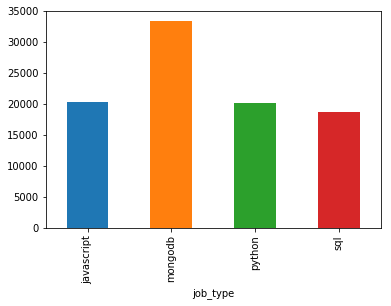

In [73]:
jobs_df_2.plot(kind='bar')

# (L)oad

In [74]:
rds_connection_string = "postgres:python123@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [75]:
engine.table_names()

['county', 'premise', 'indeed_jobs']

In [76]:
jobs_df.to_sql(name='indeed_jobs', con=engine, if_exists='append', index=False)